In [1]:
import numpy as np
import pandas as pd
import datetime as dt

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd "D:\KAVYA\data science class\Python\CASE STUDIES\Extracted Folder\Python Foundation Case Study 2 - Credit Card Case Study"

D:\KAVYA\data science class\Python\CASE STUDIES\Extracted Folder\Python Foundation Case Study 2 - Credit Card Case Study


In [3]:
Customer = pd.read_csv('Customer Acqusition.csv',index_col='No')
Customer

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [4]:
repay = pd.read_csv('Repayment.csv',index_col='SL No:',usecols=['SL No:','Customer','Month','Amount'])
repay

,Customer,Month,Amount
SL No:,,,
NaN,A1,12-Jan-04,495414.75
2.0,A1,3-Jan-04,245899.02
3.0,A1,15-Jan-04,259490.06
4.0,A1,25-Jan-04,437555.12
5.0,A1,17-Jan-05,165972.88
...,...,...,...
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [5]:
spend = pd.read_csv('spend.csv',index_col='Sl No:')
spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


In [6]:
Credit_card = pd.read_excel("Credit Card Data.xlsx")
Credit_card

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.083162,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.880658,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.951811,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.456908,CALCUTTA,Platimum,10002,C22,Self Employed


# Data Audit

In [7]:
print('Customer')
print(Customer.info())
print('-----------------------------------------------------------------------------------------------')
print('Repay')
print( repay.info())
print('-----------------------------------------------------------------------------------------------')
print('Spend')
print( spend.info())
print('-----------------------------------------------------------------------------------------------')
print('Creditcard')
print (Credit_card.info())

Customer
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ KB
None
-----------------------------------------------------------------------------------------------
Repay
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1523 entries, nan to nan
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 47.6+ KB
None
-----

In [8]:
repay.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [9]:
repay.dropna(inplace=True)

In [10]:
repay.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

# 1.a. In case age is less than 18, replace it with mean of age values

In [11]:
Customer['Age'].mean()

46.49

In [12]:
Customer.loc[Customer['Age']<18,'Age']

No
14    16
41    13
63    15
68    12
70    16
90    16
Name: Age, dtype: int64

In [13]:
Customer.loc[Customer['Age']<18,'Age'] = Customer['Age'].mean()

# 1.b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [14]:
customer_spend = pd.merge(left= Customer,right= spend,on='Customer',how='inner')
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [15]:
customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount']= 0.5*customer_spend['Limit']

# 1.c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
customer_repay = pd.merge(left=repay,right= Customer,on = 'Customer',how='inner')
customer_repay

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A7,22-Nov-05,55108.71,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [17]:
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount']=customer_repay['Limit']

# 2.a. How many distinct customers exist?

In [18]:
print(Customer['Customer'].unique())
print('Number of distinct customers is : ', Customer['Customer'].nunique())

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'A33' 'A34' 'A35' 'A36' 'A37'
 'A38' 'A39' 'A40' 'A41' 'A42' 'A43' 'A44' 'A45' 'A46' 'A47' 'A48' 'A49'
 'A50' 'A51' 'A52' 'A53' 'A54' 'A55' 'A56' 'A57' 'A58' 'A59' 'A60' 'A61'
 'A62' 'A63' 'A64' 'A65' 'A66' 'A67' 'A68' 'A69' 'A70' 'A71' 'A72' 'A73'
 'A74' 'A75' 'A76' 'A77' 'A78' 'A79' 'A80' 'A81' 'A82' 'A83' 'A84' 'A85'
 'A86' 'A87' 'A88' 'A89' 'A90' 'A91' 'A92' 'A93' 'A94' 'A95' 'A96' 'A97'
 'A98' 'A99' 'A100']
Number of distinct customers is :  100


# 2.b. How many distinct categories exist?


In [19]:
Customer['Segment'].unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

In [20]:
Customer['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

# 2.c. What is the average monthly spend by customers?

In [21]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [22]:
spend['Monthly'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,'%B'))
spend['Yearly'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,'%Y'))

In [23]:
spend.groupby(['Monthly','Yearly']).mean()

Amount
Monthly   Yearly               
April     2004    235272.037143
          2005    252181.326429
          2006    232468.967553
August    2005    233734.634286
          2006    240699.717143
December  2005    147503.060000
          2006    270470.980714
February  2004    221215.270000
          2005    229802.279821
          2006    253858.260714
January   2004    251712.068664
          2005    292741.372857
          2006    282058.006429
July      2005    229116.663571
          2006    287505.098929
June      2005    262688.112857
          2006    177252.386429
March     2004    232146.119286
          2006    247166.084654
May       2004    217539.236429
          2005    245696.515429
          2006    236162.740357
November  2004    270486.397857
          2005    286143.322857
          2006    182841.290000
October   2005    194568.640714
          2006    236136.335000
September 2004    310923.383571
          2005    188666.202143
          2006    158520.090714

# 2.d. What is the average monthly repayment by customers?


In [24]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [25]:
repay['Monthly'] = repay['Month'].apply(lambda x : pd.Timestamp.strftime(x,'%B'))
repay['Yearly'] = repay['Month'].apply(lambda x : pd.Timestamp.strftime(x,'%Y'))

In [26]:
repay.groupby(['Monthly','Yearly']).mean()

Amount
Monthly   Yearly               
April     2004    259141.679000
          2005    212688.631333
          2006    275472.251889
August    2005    264430.921622
          2006    224143.992500
December  2005    320379.335833
          2006    252736.569167
February  2004    256702.630741
          2005    238829.265123
          2006    284489.565128
January   2004    243489.649786
          2005    240548.098148
          2006    293475.389167
July      2005    239871.479167
          2006    257936.383243
June      2005    210199.818333
          2006    251990.453333
March     2004    252585.280667
          2006    240851.266814
May       2004    226162.720800
          2005    263207.367857
          2006    256920.884943
November  2004    209592.238000
          2005    256695.120000
          2006    199399.197407
October   2005    219849.956667
          2006    260765.480000
September 2004    184487.848750
          2005    247700.170000
          2006    262533.880833

# 2. e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

In [27]:
cust_spend_repay = pd.merge(left=repay,right=spend,on='Customer',how ='inner')
cust_spend_repay

,Customer,Month_x,Amount_x,Monthly_x,Yearly_x,Month_y,Type,Amount_y,Monthly_y,Yearly_y
0,A1,2004-01-12,495414.75,January,2004,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-12,495414.75,January,2004,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-12,495414.75,January,2004,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-12,495414.75,January,2004,2004-01-25,FOOD,484342.47,January,2004
4,A1,2004-01-12,495414.75,January,2004,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...
37279,A7,2004-01-03,473662.61,January,2004,2006-05-03,AIR TICKET,305050.62,May,2006
37280,A7,2004-01-03,473662.61,January,2004,2005-02-23,CAMERA,314704.54,February,2005
37281,A7,2004-01-03,473662.61,January,2004,2004-01-12,AUTO,498358.28,January,2004
37282,A7,2004-01-03,473662.61,January,2004,2004-01-25,TRAIN TICKET,461282.47,January,2004


In [28]:
interest_group = cust_spend_repay.groupby(['Monthly_x','Monthly_y','Yearly_x','Yearly_y'])['Amount_x','Amount_y'].sum()

In [29]:
interest_group = interest_group.rename(columns={'Amount_x':'Repay_Amount','Amount_y':'Spend_Amount'})

In [30]:
interest_group['Monthly_profit']=interest_group['Repay_Amount']-interest_group['Spend_Amount']
interest_group

Repay_Amount  Spend_Amount  \
Monthly_x Monthly_y Yearly_x Yearly_y                               
April     April     2004     2004        4175462.74    5709623.83   
                             2005        5801188.97    6836307.92   
                             2006       11627901.14   10575437.93   
                    2005     2004        1550830.83    2438482.77   
                             2005        5303140.26    6397517.59   
...                                             ...           ...   
September September 2005     2005        1128231.04     939846.15   
                             2006         663648.85     756913.33   
                    2006     2004        1295902.95     947050.65   
                             2005         406166.71     185913.62   
                             2006        1276369.16     733211.92   

                                       Monthly_profit  
Monthly_x Monthly_y Yearly_x Yearly_y                  
April     April     2004     2004         -1534161.09  
                             2005         -1035118.95  
                             2006          1052463.21  
                    2005     2004          -887651.94  
                             2005         -1094377.33  
...                                               ...  
September September 2005     2005           188384.89  
                             2006           -93264.48  
                    2006     2004           348852.30  
                             2005           220253.09  
                             2006           543157.24  

[898 rows x 3 columns]

In [31]:
interest_group = interest_group.loc[interest_group['Monthly_profit'] > 0]

In [32]:
interest_group['Interest_earned']=0.029*interest_group['Monthly_profit']

In [33]:
# x is repay and y is spend
interest_group

Repay_Amount  Spend_Amount  \
Monthly_x Monthly_y Yearly_x Yearly_y                               
April     April     2004     2006       11627901.14   10575437.93   
                    2005     2006       12841029.82   10625516.57   
                    2006     2004        9455720.18    9012828.91   
                             2006       38562634.26   32628980.75   
          August    2004     2005        5847473.96    5199441.66   
...                                             ...           ...   
September September 2005     2004        1200404.01    1098917.50   
                             2005        1128231.04     939846.15   
                    2006     2004        1295902.95     947050.65   
                             2005         406166.71     185913.62   
                             2006        1276369.16     733211.92   

                                       Monthly_profit  Interest_earned  
Monthly_x Monthly_y Yearly_x Yearly_y                                   
April     April     2004     2006          1052463.21      30521.43309  
                    2005     2006          2215513.25      64249.88425  
                    2006     2004           442891.27      12843.84683  
                             2006          5933653.51     172075.95179  
          August    2004     2005           648032.30      18792.93670  
...                                               ...              ...  
September September 2005     2004           101486.51       2943.10879  
                             2005           188384.89       5463.16181  
                    2006     2004           348852.30      10116.71670  
                             2005           220253.09       6387.33961  
                             2006           543157.24      15751.55996  

[499 rows x 4 columns]

# 2.f. What are the top 5 product types?

In [34]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

# 2.g. Which city is having maximum spend?

In [35]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,January,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,January,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,January,2004


In [36]:
cust_spend.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1)

City
COCHIN    73495349.26
Name: Amount, dtype: float64

# 2.h. Which age group is spending more money?

In [37]:
Customer['Age'] = Customer['Age'].astype('int')

In [38]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [39]:
cust_spend.groupby('Age')['Amount'].sum().sort_values(ascending=False).head(1)

Age
28    25098877.03
Name: Amount, dtype: float64

# 2.i. Who are the top 10 customers in terms of repayment?

In [40]:
cust_repay = pd.merge(left= Customer, right=repay, on='Customer',how='inner')
cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,January,2004
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,January,2004
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,January,2004
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,January,2004


In [41]:
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [42]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [43]:
City_spend = pd.pivot_table(data = cust_spend,index=['City','Yearly'],columns='Product',aggfunc='sum',values='Amount')
City_spend

Product                   Gold     Platimum      Silver
City       Yearly                                      
BANGALORE  2004     9289878.54   6046763.93  6773901.65
           2005    12892362.99   7784194.68  3936068.22
           2006    12030611.09   5620904.86  4967945.66
BOMBAY     2004     6987853.53   5199581.00  3061805.08
           2005     8983018.28   5134074.48  2368375.97
           2006     7917144.31   7547549.72  3628864.37
CALCUTTA   2004     7477140.98   5961165.93  3321963.10
           2005    10303355.80   8810284.03  1285609.11
           2006    11167532.77  11305526.03  4783182.26
CHENNAI    2004     1059618.50   5558572.68  1156129.37
           2005     3740945.58   8868435.43  1000540.48
           2006     2704288.62   6921130.79  1665326.62
COCHIN     2004     7315850.15   8472832.23  4587738.70
           2005    12110613.03  10856722.82  2619231.25
           2006    10499142.38  12453968.83  4579249.87
DELHI      2004     2806495.00   1565199.90  4293224.28
           2005     1964845.27   2068490.16  2515127.59
           2006     2957103.32    764247.73  4581831.29
PATNA      2004     2072567.90   1113069.60  3398795.65
           2005     3252615.77   2883231.07  5244763.90
           2006     2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004     2415102.84   3761433.87   795897.19
           2005     1240375.85   7186762.35  1445540.63
           2006     2735710.87   4174473.45  2005942.36

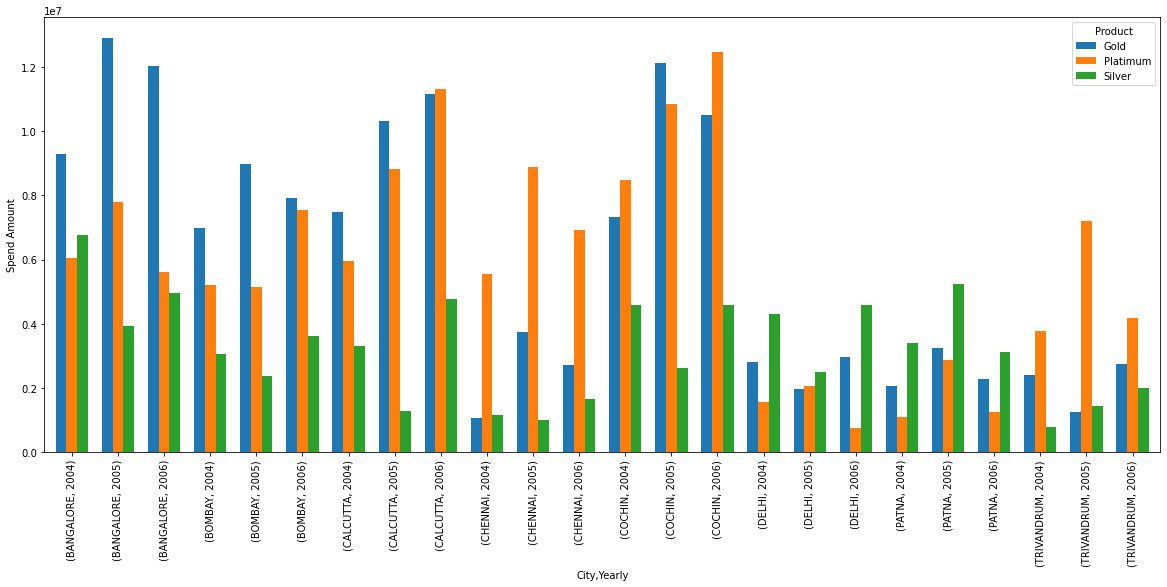

In [44]:
City_spend.plot(kind='bar',figsize=(20,8),width=0.7)
plt.ylabel('Spend Amount')
plt.show()

# 4. Create graphs for
 

# a. Monthly comparison of total spends, city wise

In [45]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004


In [46]:
City_spend_monthly = pd.pivot_table(data = cust_spend,index=['Monthly'],columns='City',aggfunc='sum',values='Amount')
City_spend_monthly

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Monthly,,,,,,,,
April,6182081.72,3726382.34,6883832.96,3231144.38,7070107.83,2845176.75,2786278.83,2775772.32
August,1552898.45,1066744.75,2179294.85,681577.16,2582997.08,475893.81,813559.15,561400.55
December,722473.97,604939.17,456826.68,223628.27,2011774.32,967169.49,223902.41,640922.26
February,9875860.87,7813534.61,11449586.70,5866408.35,9459367.08,3072043.85,3466726.76,4459329.30
January,17782487.66,10681854.60,14163384.38,7649568.68,18692606.60,7373794.37,7388720.78,5688758.54
July,3737413.09,612457.59,2323261.43,1186667.37,1758023.02,488399.04,191003.23,960551.29
June,1382739.41,1486412.18,2693423.54,1903803.90,2738031.53,828262.78,1653183.92,828576.89
March,10765773.46,9857699.82,10076115.86,4413870.52,10733411.24,3386628.30,3795753.30,3855833.54
May,10743668.90,6974931.87,7868030.30,4422623.36,9912248.75,2638193.66,3476601.00,4631877.09


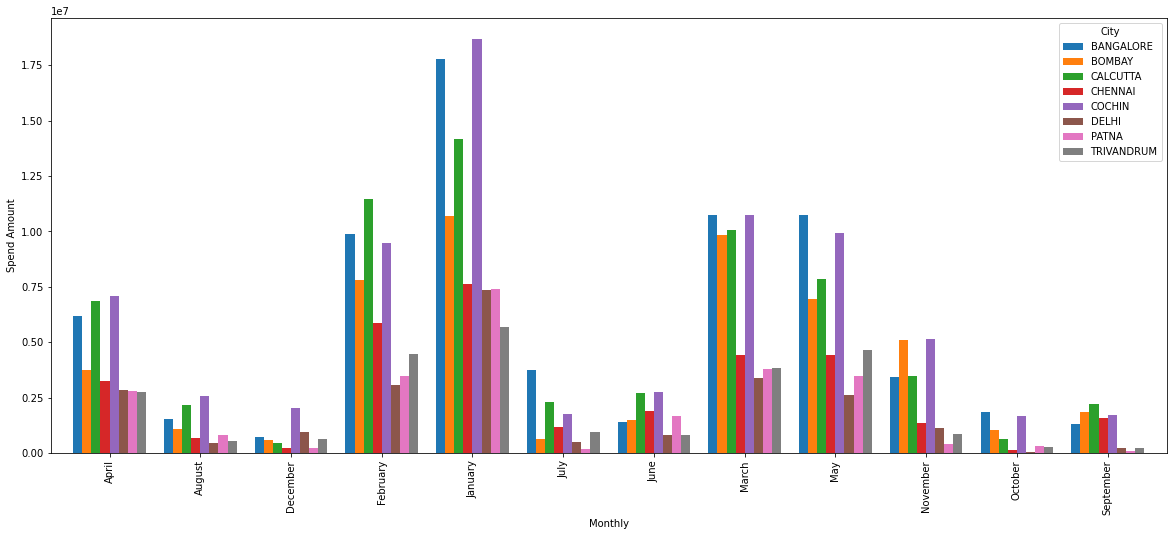

In [47]:
City_spend_monthly.plot(kind='bar',figsize=(20,8),width=0.8)
plt.ylabel('Spend Amount')
plt.show()

# 4.b. Comparison of yearly spend on air tickets

In [48]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004


In [49]:

 airtickets_yearly_spend = cust_spend.groupby(['Yearly','Type'])['Amount'].sum().reset_index()

In [50]:
airtickets = airtickets_yearly_spend.loc[airtickets_yearly_spend['Type'] =='AIR TICKET']
airtickets

,Yearly,Type,Amount
0,2004,AIR TICKET,8370914.59
15,2005,AIR TICKET,14495718.73
30,2006,AIR TICKET,10088812.10


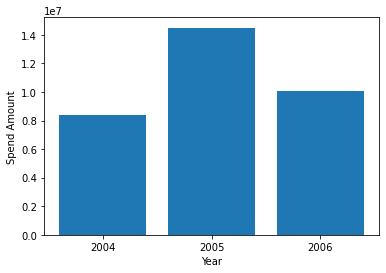

In [51]:
plt.bar(airtickets['Yearly'],height=airtickets['Amount'])
plt.xlabel('Year')
plt.ylabel('Spend Amount')
plt.show()

# 4.c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [52]:
cust_spend = pd.merge(left=Customer, right=spend, on='Customer', how='inner')
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004


In [53]:
Monthly_spend_product = pd.pivot_table(data = cust_spend,index=['Monthly'],columns='Product',aggfunc='sum',values='Amount')
Monthly_spend_product

Product,Gold,Platimum,Silver
Monthly,,,
April,13170572.59,12798498.34,9531706.20
August,4954030.42,3892605.15,1067730.23
December,2332940.96,2951972.85,566722.76
February,24779179.55,22081411.74,8602266.23
January,32413831.83,35212526.96,21794816.82
July,5167416.37,3695098.37,2395261.32
June,6538862.64,4756418.62,2219152.89
March,19256972.48,22639437.70,14988675.86
May,21548169.76,19380600.97,9739404.20


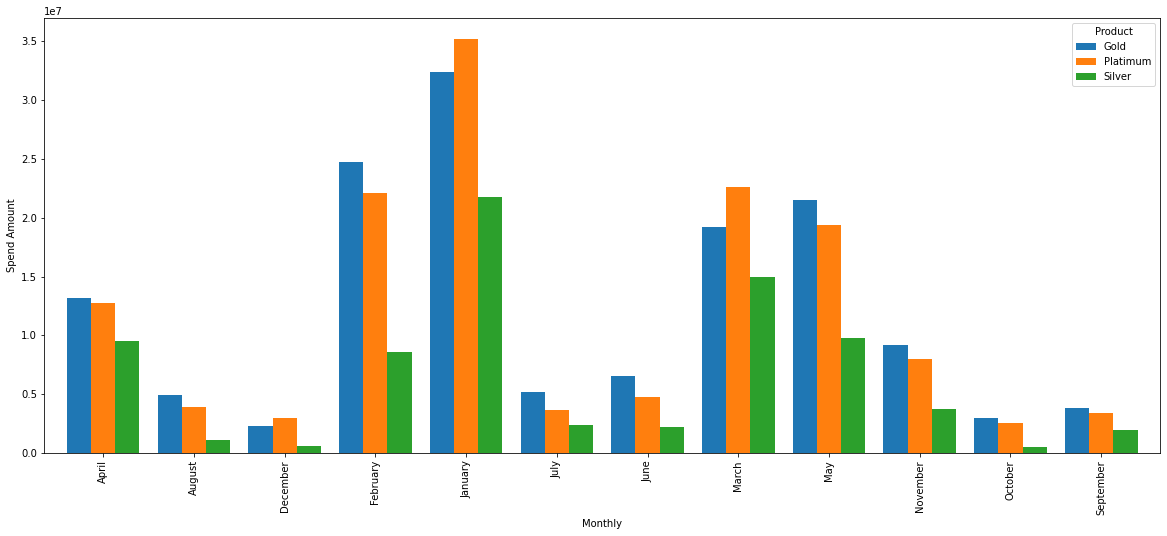

In [54]:
Monthly_spend_product.plot(kind='bar',figsize=(20,8),width=0.8)
plt.ylabel('Spend Amount')
plt.show()

In [55]:
print('The highest product sales is during January')
print('From the graph we can understand that the sales of product are high during months: January,February,March,April,May')

The highest product sales is during January
From the graph we can understand that the sales of product are high during months: January,February,March,April,May


# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [56]:
cust_repay = pd.merge(left= Customer, right=repay, on='Customer',how='inner')
cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,Yearly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,January,2004
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,January,2004
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,January,2004
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,January,2004


In [90]:
def summary_report(product,timeperiod):
    if product=='gold' and timeperiod =='monthly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:]
    elif product=='gold' and timeperiod =='yearly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:] 
        
    elif product=='silver' and timeperiod =='monthly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:]
    elif product=='silver' and timeperiod =='yearly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:]
        
    elif product=='platimum' and timeperiod =='monthly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc['Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:]
    elif product=='platimum' and timeperiod =='yearly':
        pivot = pd.pivot_table(data = cust_repay,index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc['Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI'],:]
        
    return result

In [94]:
summary_report('gold','monthly')

Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na